In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
#Lendo o doc
df = pd.read_excel('data_cli.xlsx')
df.head(1)

,ProdutoID,Produto,VendasID,Vendedor,Quantidade,Data,ValorUnitario,ValorTotal,Desconto,TotalComDesconto,ClienteID,Cliente,Estado,Sexo,Status
0,1,Bicicleta Aro 29 Mountain Bike Endorphine 6.3 ...,346,Iberê Lacerda,2,2016-11-16,7966.8,15933.6,3186.72,12746.88,219,Honorina Camarinho,PR,F,Silver


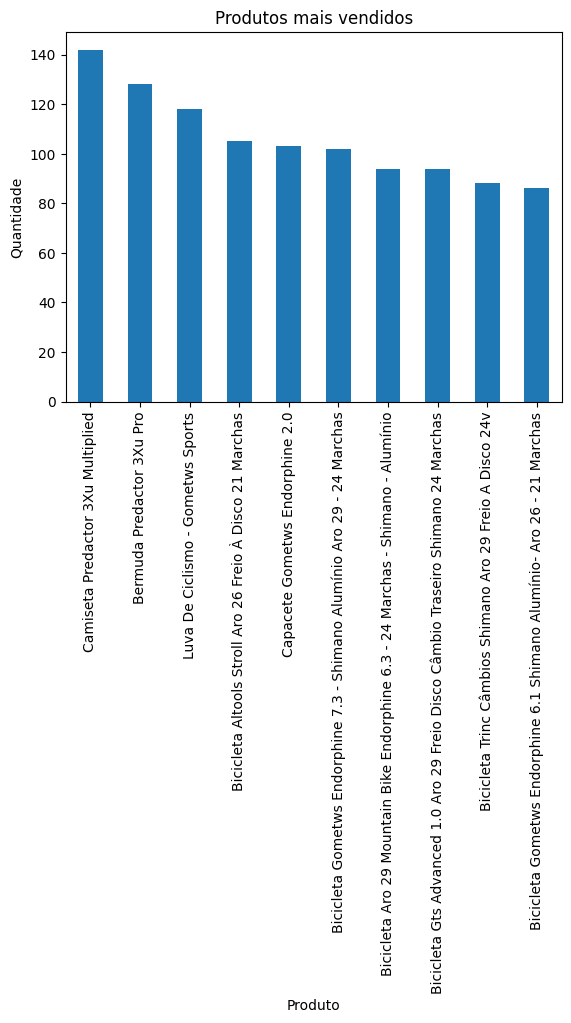

In [112]:
#Qual é o produto mais vendido em termos de quantidade?
df = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Produtos mais vendidos', xlabel='Produto', ylabel='Quantidade')
plt.show()

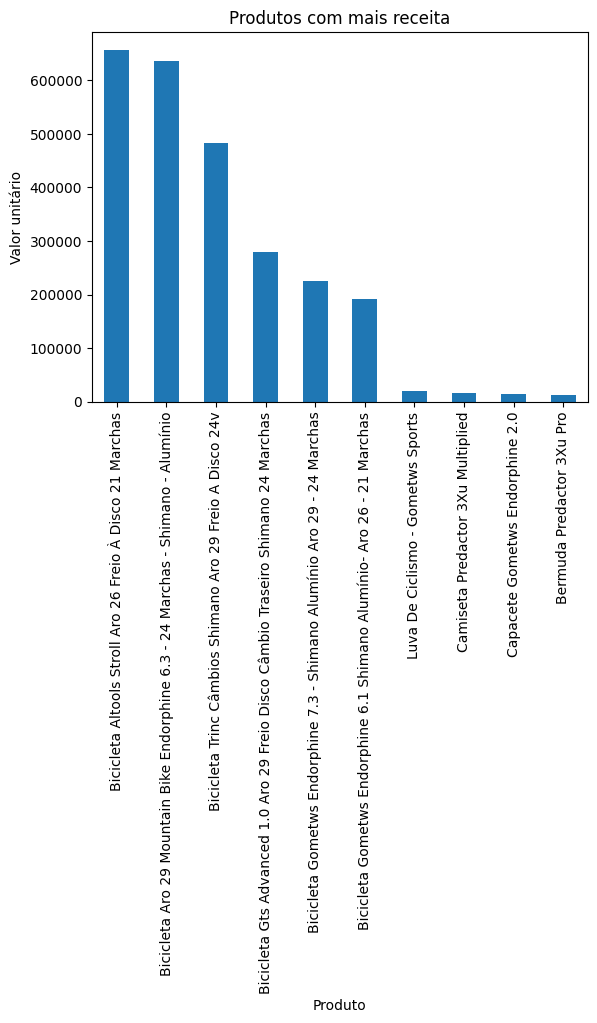

In [115]:
#Qual é o produto que gerou mais receita?
df = df.groupby('Produto')['ValorUnitario'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Produtos com mais receita', xlabel='Produto', ylabel='Valor unitário')
plt.show()

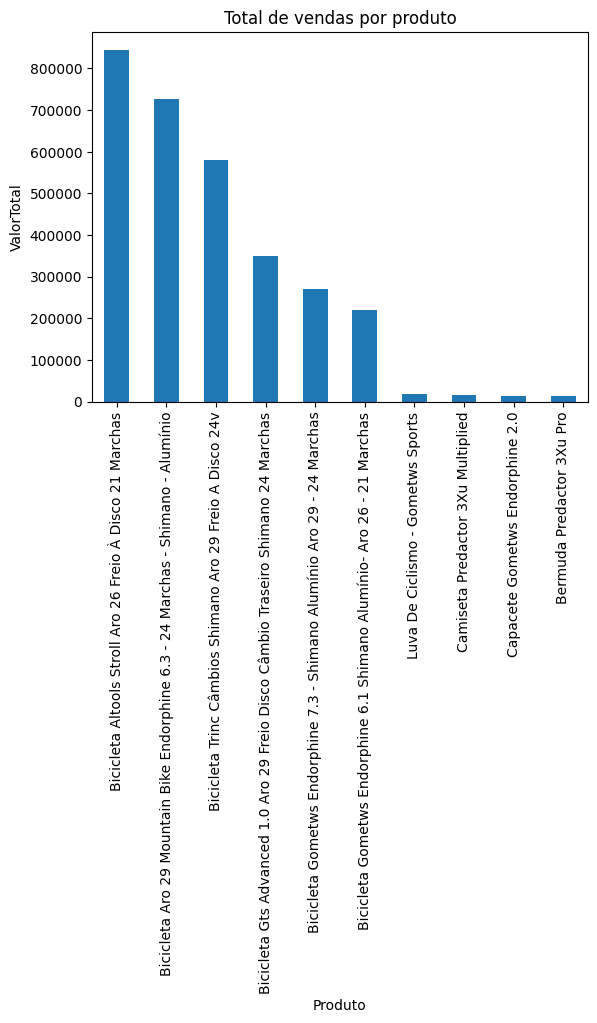

In [ ]:
#Qual o valor total de vendas por produto?
df = df.groupby('Produto')['ValorTotal'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Total de vendas por produto', xlabel='Produto', ylabel='Valor total')
plt.show()

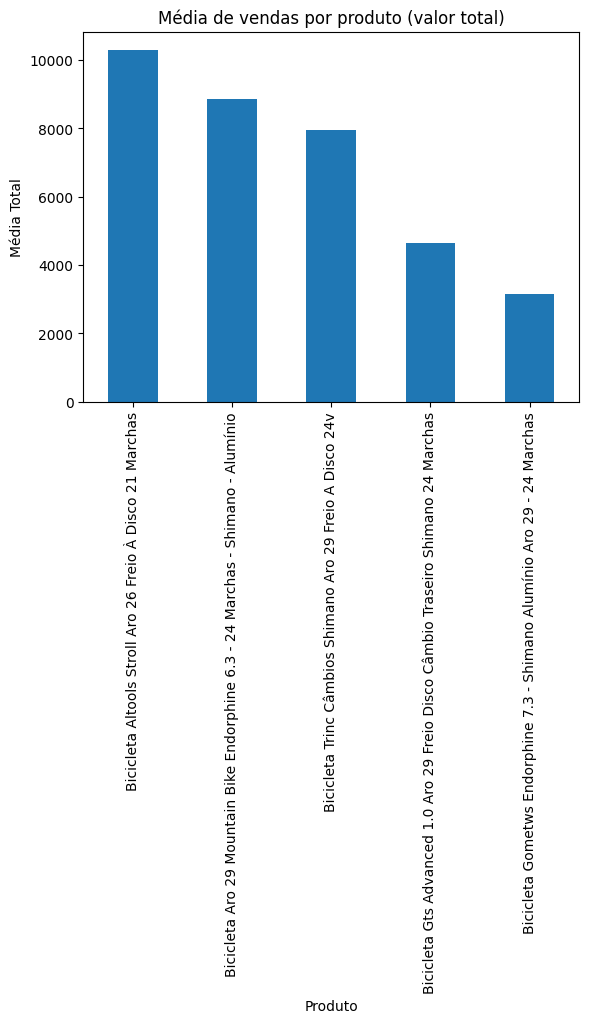

In [ ]:
#Qual o valor médio de vendas por produto?
df = df.groupby('Produto')['ValorTotal'].mean().sort_values(ascending=False)
df.head(5).plot(kind='bar', title='Média de vendas por produto (valor total)', xlabel='Produto', ylabel='Média total')
plt.show()

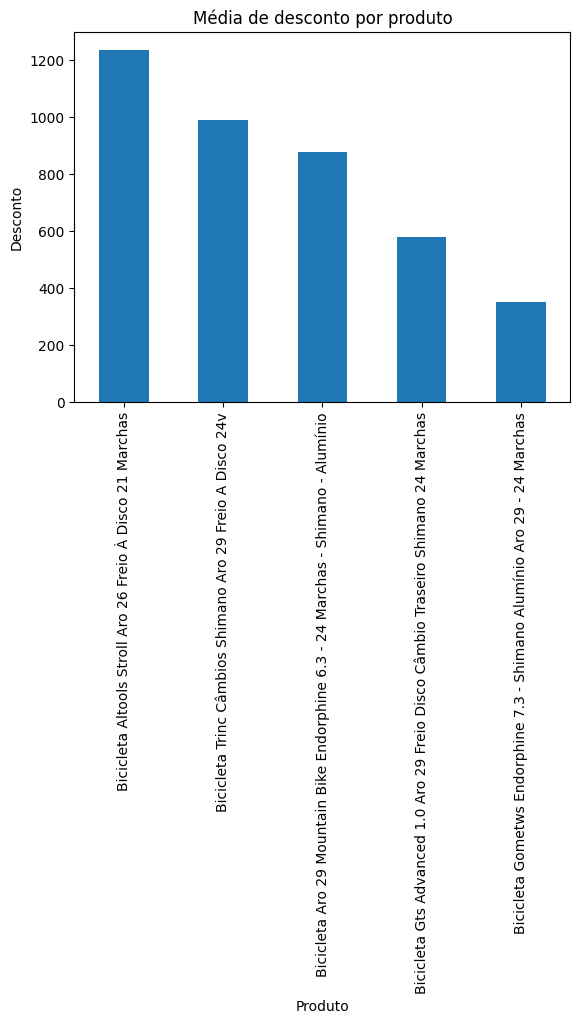

In [ ]:
#Qual é o desconto médio concedido nas vendas?
df = df.groupby('Produto')['Desconto'].mean().sort_values(ascending=False)
df.head(5).plot(kind='bar', title='Média de desconto por produto', xlabel='Produto', ylabel='Desconto')
plt.show()

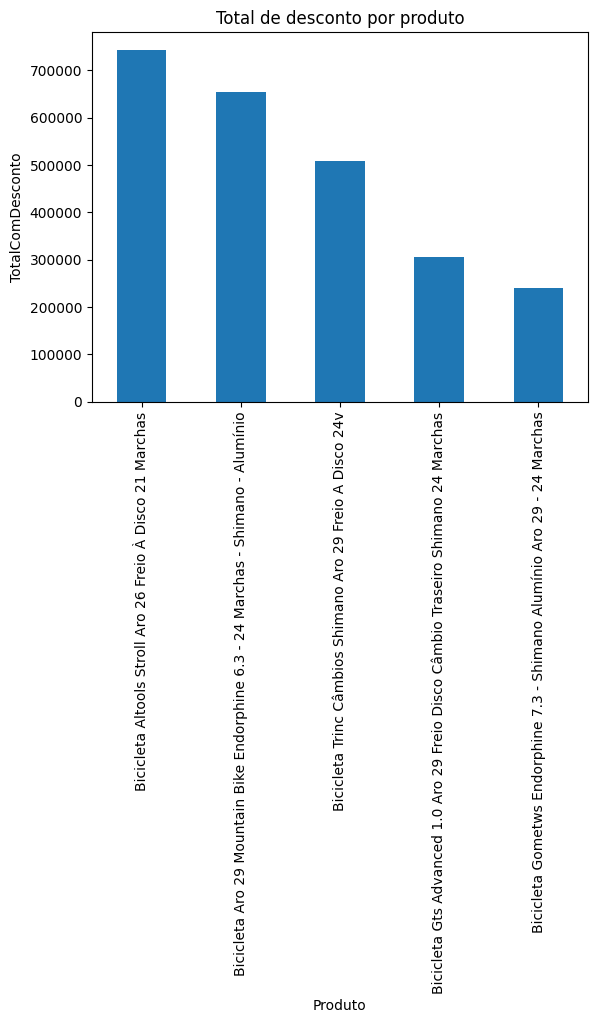

In [ ]:
#Qual é o valor total de descontos concedidos? (5 produtos)
df = df.groupby('Produto')['TotalComDesconto'].sum().sort_values(ascending=False)
df.head(5).plot(kind='bar', title='Total de desconto por produto', xlabel='Produto', ylabel='Valor total com desconto')
plt.show()

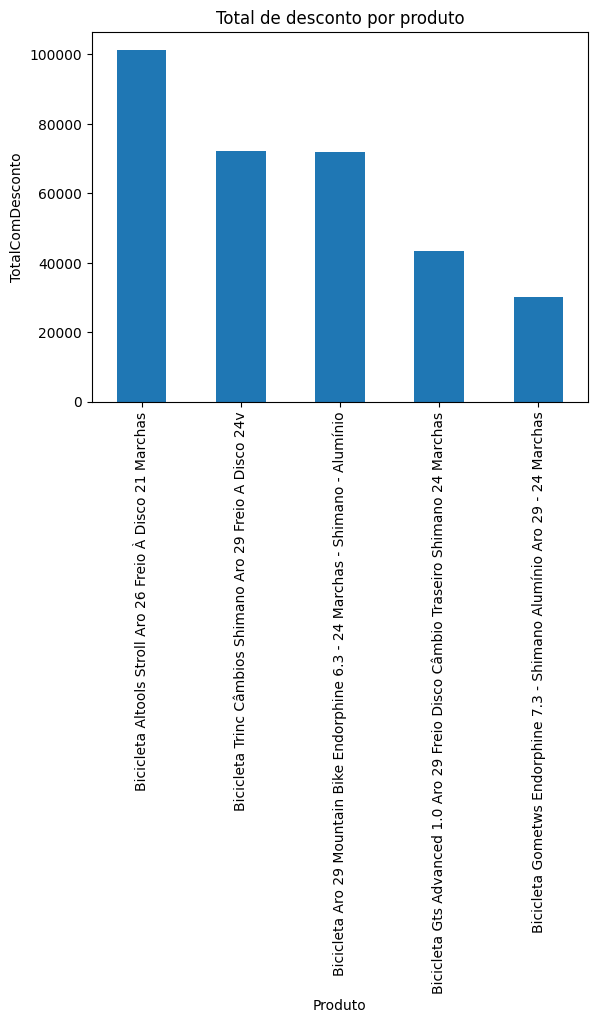

In [ ]:
#Quais produtos recebem maiores descontos?
df = df.groupby('Produto')['Desconto'].sum().sort_values(ascending=False)
df.head(5).plot(kind='bar', title='Total de desconto por produto', xlabel='Produto', ylabel='Valor')
plt.show()

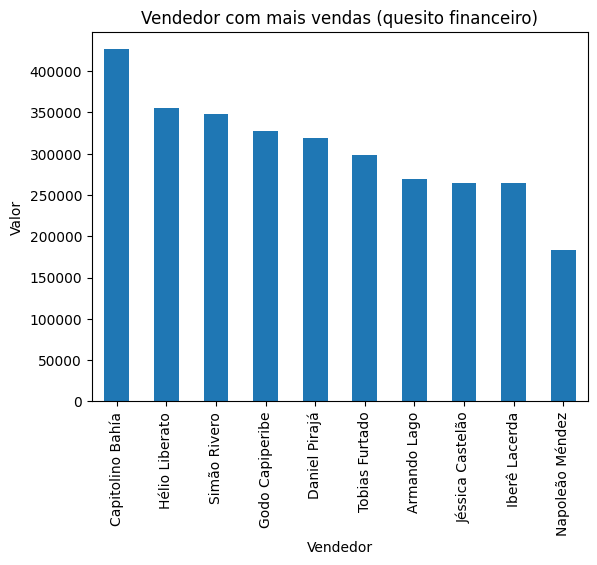

In [ ]:
#Qual é o vendedor com mais vendas em termos de valor?
df = df.groupby('Vendedor')['ValorTotal'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Vendedor com mais vendas (quesito financeiro)', xlabel='Vendedor', ylabel='Valor')
plt.show()

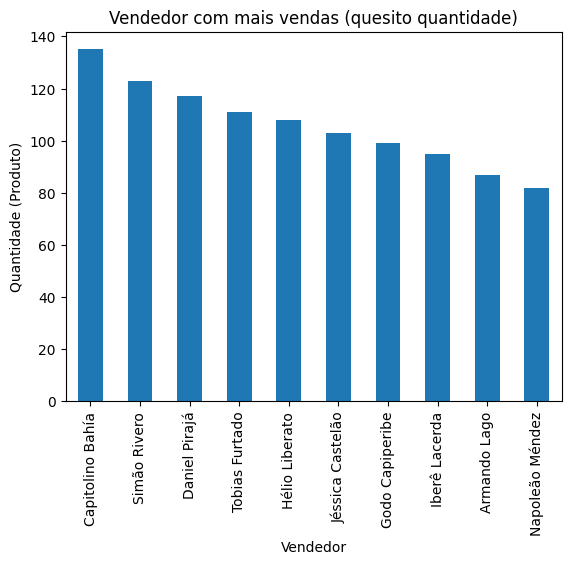

In [ ]:
#Qual é o vendedor com mais vendas em termos de quantidade?
df = df.groupby('Vendedor')['Quantidade'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Vendedor com mais vendas (quesito quantidade)', xlabel='Vendedor', ylabel='Quantidade (Produto)')
plt.show()

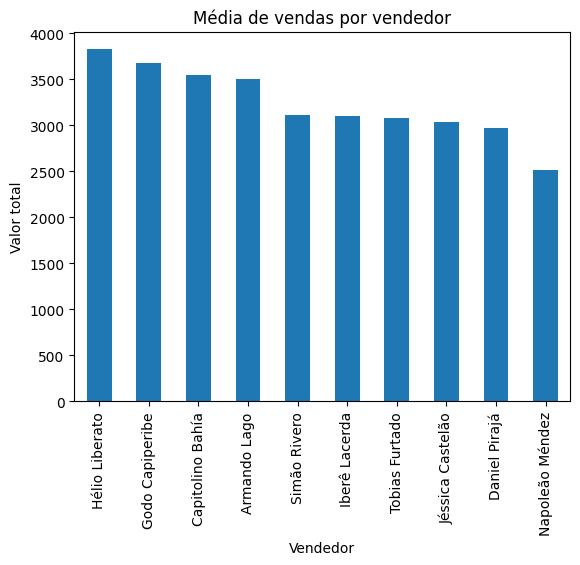

In [ ]:
#Qual é o valor médio de vendas por vendedor?
df = df.groupby('Vendedor')['ValorTotal'].mean().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Média de vendas por vendedor', xlabel='Vendedor', ylabel='Valor total')
plt.show()

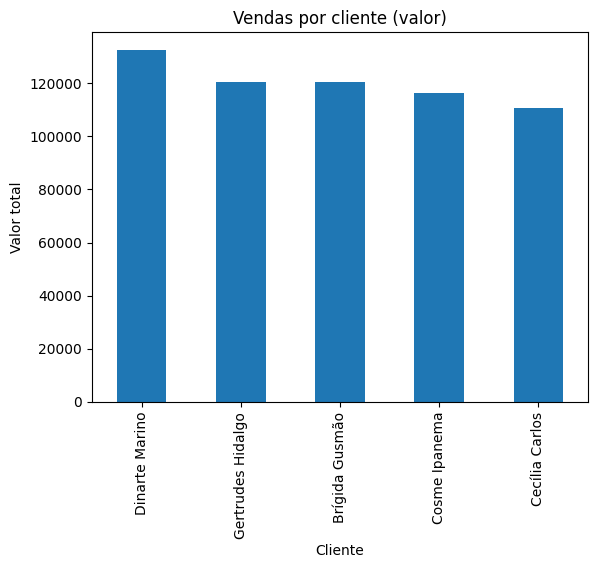

In [ ]:
#Qual é o cliente com mais compras em termos de valor total?
df = df.groupby('Cliente')['ValorTotal'].sum().sort_values(ascending=False)
df.head(5).plot(kind='bar', title='Vendas por cliente (valor)', xlabel='Cliente', ylabel='Valor total')
plt.show()

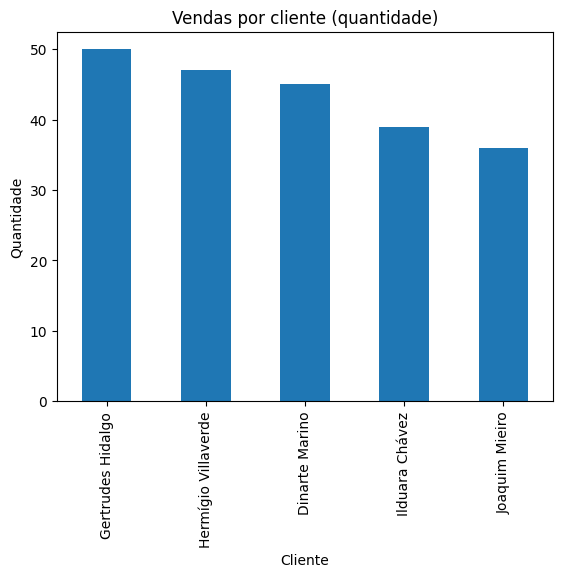

In [ ]:
#Qual é o cliente com mais compras em termos de quantidade?
df = df.groupby('Cliente')['Quantidade'].sum().sort_values(ascending=False)
df.head(5).plot(kind='bar', title='Vendas por cliente (quantidade)', xlabel='Cliente', ylabel='Quantidade')
plt.show()

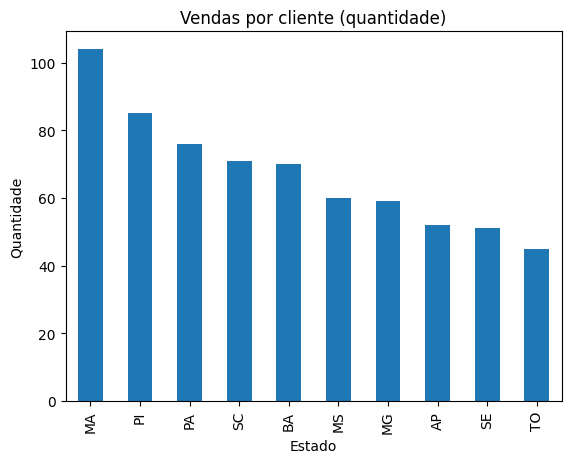

In [ ]:
#Quais são os estados com maior volume de vendas?
df = df.groupby('Estado')['Quantidade'].sum().sort_values(ascending=False)
df.head(10).plot(kind='bar', title='Vendas por estado (quantidade)', xlabel='Estado', ylabel='Quantidade')
plt.show()

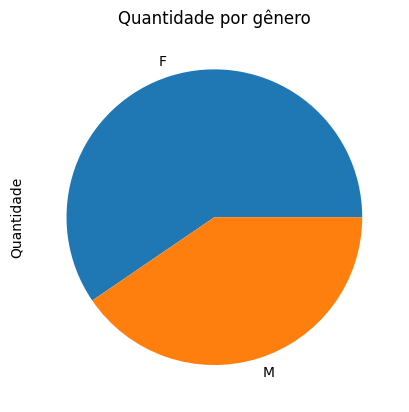

In [ ]:
#Qual é a distribuição de compras por gênero?
df = df.groupby('Sexo')['Quantidade'].sum().sort_values(ascending=False)
df.plot(kind='pie', title='Quantidade por gênero', xlabel='Sexo', ylabel='Quantidade')
plt.show()

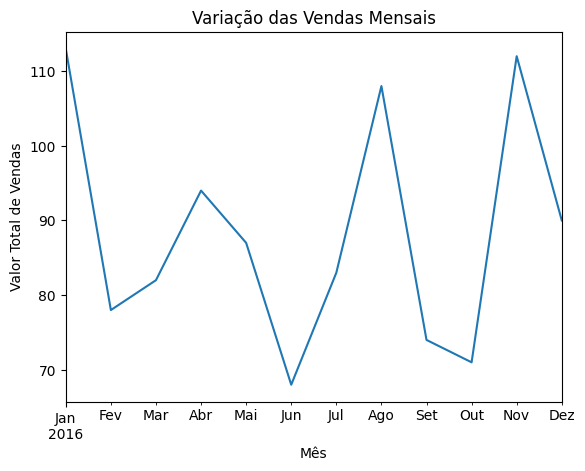

In [ ]:
#Quais são os períodos com mais vendas?
df['Data'] = pd.to_datetime(df['Data'])
vendas_mensais = df.groupby(df['Data'].dt.to_period('M'))['Quantidade'].sum()

vendas_mensais.plot(kind='line', title='Período com mais vendas por mês', xlabel='Mês', ylabel='Quantidade')
plt.show()

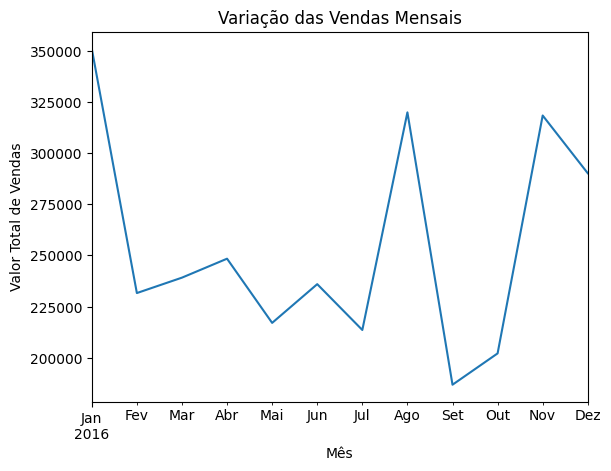

In [ ]:
#Qual é a variação nas vendas ao longo do tempo?
df['Data'] = pd.to_datetime(df['Data'])
vendas = df.groupby(df['Data'].dt.to_period('M'))['ValorTotal'].sum()

vendas.plot(kind='line', title='Variação das vendas por mês', xlabel='Mês', ylabel='Valor total')
plt.show()

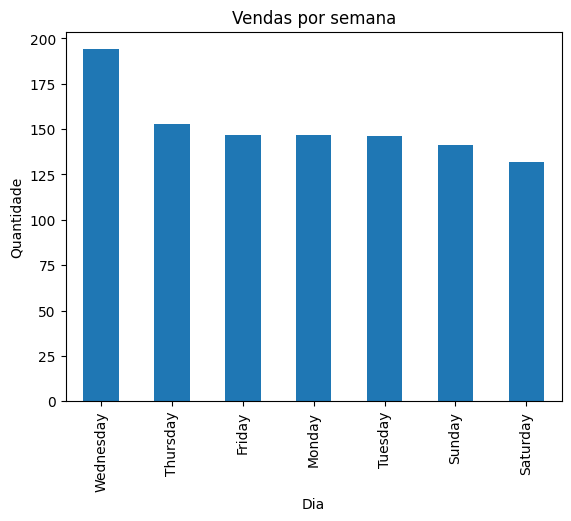

In [ ]:
#Qual é o dia da semana com maior volume de vendas?
df['Data'] = pd.to_datetime(df['Data'])
df['DiaSemana'] = df['Data'].dt.day_name()

df = df.groupby('DiaSemana')['Quantidade'].sum().sort_values(ascending=False)
df.plot(kind='bar', title='Vendas por semana', xlabel='Dia', ylabel='Quantidade')
plt.show()

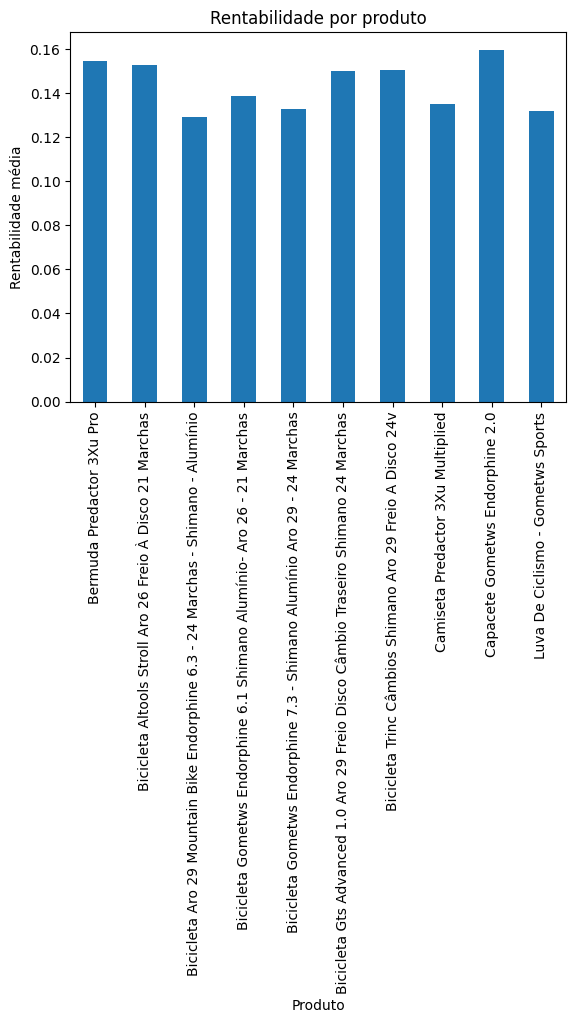

In [ ]:
#Qual é a rentabilidade por produto?
df['Lucro'] = df['Desconto']
df['Rentabilidade'] = df['Lucro'] / df['TotalComDesconto']

rentabilidade = df.groupby('Produto')['Rentabilidade'].mean()
rentabilidade.plot(kind='bar', title='Rentabilidade por produto', xlabel='Produto', ylabel='Rentabilidade média')
plt.show()
